# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Total number of cities: {len(cities)}")



Total number of cities: 629


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Create query
units = 'Metric'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units{units}&q="


In [18]:
#Source: In Class Python API- Day 2 Activity 3, 4, 7, 8, 9

#Create variables for looping

t_max = []
humidity = []
clouds = []
wind = []
lat = []
long = []
country = []
date = []
city_name = []
count = 1

print("------\nBeginning Data Retrieval \n------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        t_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name_processing=response['name']
        print(f'Processing record {count}|{city_name_processing}')
        count += 1
    except KeyError:
        print('City not found. Skipping...')
    continue
print('-----\nDate Retrieval complete-----')
                                     





------
Beginning Data Retrieval 
------
Processing record 1|Cape Town
Processing record 2|Dikson
Processing record 3|Vardø
Processing record 4|Albany
Processing record 5|Hobart
Processing record 6|Gaya
City not found. Skipping...
Processing record 7|Mataura
Processing record 8|Hermanus
Processing record 9|Hilo
City not found. Skipping...
Processing record 10|Rikitea
Processing record 11|Road Town
Processing record 12|Inhambane
Processing record 13|Kapaa
City not found. Skipping...
Processing record 14|Constitución
Processing record 15|Ushuaia
Processing record 16|Langham
Processing record 17|Saint-Pierre
Processing record 18|San Rafael
Processing record 19|Qaanaaq
Processing record 20|Iqaluit
Processing record 21|Lata
Processing record 22|Carnarvon
Processing record 23|Ribeira Grande
City not found. Skipping...
Processing record 24|Busselton
Processing record 25|Walvis Bay
Processing record 26|Vaini
City not found. Skipping...
City not found. Skipping...
Processing record 27|Arraial do

Processing record 240|Pevek
Processing record 241|Karpathos
Processing record 242|Santa Isabel Rio Negro
Processing record 243|Avarua
Processing record 244|Pitimbu
Processing record 245|Wanaka
City not found. Skipping...
Processing record 246|Severo-Yeniseyskiy
Processing record 247|Olafsvik
Processing record 248|Beringovskiy
Processing record 249|Manjakandriana
Processing record 250|Castro
Processing record 251|Ucluelet
Processing record 252|Kiryat Gat
Processing record 253|Mayskiy
Processing record 254|College
Processing record 255|Sola
Processing record 256|Pulivendla
Processing record 257|Hirara
Processing record 258|Beckley
Processing record 259|Sangar
Processing record 260|Esim
Processing record 261|Cayenne
Processing record 262|Calama
Processing record 263|Broome
City not found. Skipping...
Processing record 264|Province of Mantua
Processing record 265|Sibu
Processing record 266|Astoria
Processing record 267|Fort Saint James
Processing record 268|Okha
Processing record 269|Hofn


Processing record 488|Bethel
Processing record 489|Ruska Poliana
Processing record 490|Nyurba
Processing record 491|Urengoy
Processing record 492|Mount Isa
Processing record 493|Hualmay
Processing record 494|Visby
Processing record 495|La Tuque
City not found. Skipping...
Processing record 496|Reykjavik
Processing record 497|Novikovo
Processing record 498|Pringsewu
Processing record 499|Marsh Harbour
Processing record 500|Cascais
Processing record 501|Zhigansk
City not found. Skipping...
Processing record 502|San Nicolas
Processing record 503|Vrangel'
Processing record 504|Millinocket
Processing record 505|Comodoro Rivadavia
City not found. Skipping...
Processing record 506|Hachiōji
Processing record 507|Ola
Processing record 508|Nacala
Processing record 509|Sokoto
Processing record 510|Serowe
Processing record 511|Ahipara
Processing record 512|Fereydūnkenār
Processing record 513|Chardara
Processing record 514|Weihe
Processing record 515|Soldotna
Processing record 516|Haukipudas
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#create dataframe for raw data
#source in class assignments

weather_dictionary = {
    'city': city_name,
    'lat': lat,
    'lng': long,
    'max_temp': t_max,
    'humidity': humidity,
    'cloudiness': clouds,
    'wind_speed': wind,
    'country': country,
    'date': date
}   


weather_df = pd.DataFrame(weather_dictionary)

#export to CSV
weather_df.to_csv('cityweather.csv', encoding = 'utf-8', index = False)



In [20]:
# Ensure count is over 500
weather_df.count()

city          580
lat           580
lng           580
max_temp      580
humidity      580
cloudiness    580
wind_speed    580
country       580
date          580
dtype: int64

In [21]:
#display dataframe
weather_df.head(15)

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Cape Town,-33.9258,18.4232,291.08,85,0,0.45,ZA,1633988204
1,Dikson,73.5069,80.5464,272.48,67,100,6.38,RU,1633988455
2,Vardø,70.3705,31.1107,279.26,96,100,2.93,NO,1633988455
3,Albany,42.6001,-73.9662,294.38,77,25,0.79,US,1633988394
4,Hobart,-42.8794,147.3294,282.66,81,40,0.45,AU,1633988456
5,Gaya,24.7833,85.0000,298.10,94,2,0.00,IN,1633988323
6,Mataura,-46.1927,168.8643,279.16,87,99,3.93,NZ,1633988456
7,Hermanus,-34.4187,19.2345,289.21,80,100,0.93,ZA,1633988457
8,Hilo,19.7297,-155.0900,299.40,88,90,3.60,US,1633988457
9,Rikitea,-23.1203,-134.9692,296.61,77,90,5.92,PF,1633988457


In [24]:
weather_df.describe()

,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.384834,18.567281,289.636121,72.793103,61.334483,3.551017,1.633989e+09
std,33.823381,92.041334,10.616528,19.326982,37.768569,2.653490,6.851250e+01
min,-54.800000,-179.166700,253.900000,6.000000,0.000000,0.000000,1.633988e+09
25%,-8.803375,-64.823575,281.452500,64.000000,22.000000,1.565000,1.633988e+09
50%,21.107150,20.679200,291.985000,77.000000,75.000000,2.765000,1.633989e+09
75%,48.767150,104.117875,298.422500,87.000000,98.000000,5.030000,1.633989e+09
max,78.218600,179.316700,307.880000,100.000000,100.000000,16.460000,1.633989e+09


In [22]:
print('Summary Statistics verify no humidity values greater than 100.')


Summary Statistics verify no humidity values greater than 100.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

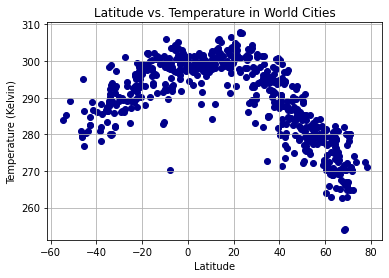

In [30]:



plt.scatter(weather_df["lat"], weather_df["max_temp"], marker="o", c="darkblue")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature in World Cities")
plt.ylabel("Temperature (Kelvin)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeTemperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

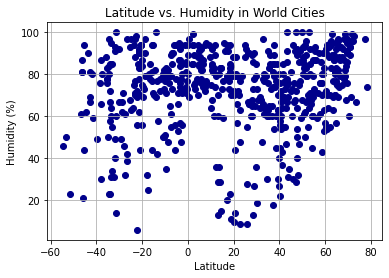

In [31]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o", c='darkblue')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

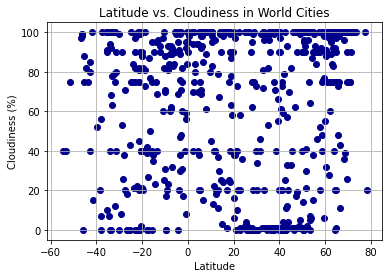

In [32]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o", c='darkblue')

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

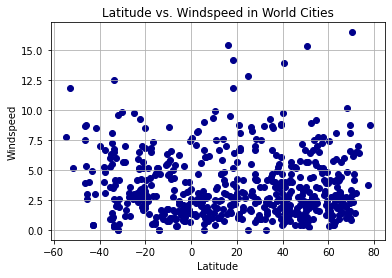

In [33]:
plt.scatter(weather_df["lat"], weather_df["wind_speed"], marker="o", c='darkblue')

# Incorporate the other graph properties
plt.title("Latitude vs. Windspeed in World Cities")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeWindspeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
# Create dataFrame for Nothern Hemisphere Data
n_hem = weather_df[weather_df['lat'] > 0]
n_hem 




,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
1,Dikson,73.5069,80.5464,272.48,67,100,6.38,RU,1633988455
2,Vardø,70.3705,31.1107,279.26,96,100,2.93,NO,1633988455
3,Albany,42.6001,-73.9662,294.38,77,25,0.79,US,1633988394
5,Gaya,24.7833,85.0000,298.10,94,2,0.00,IN,1633988323
8,Hilo,19.7297,-155.0900,299.40,88,90,3.60,US,1633988457
...,...,...,...,...,...,...,...,...,...
573,Ixtapa,20.7000,-105.2000,304.39,79,97,1.34,MX,1633988631
574,Viseu,40.6610,-7.9097,290.87,54,61,2.51,PT,1633988644
575,Pandan,14.0453,124.1694,300.52,83,100,7.58,PH,1633988644
578,Muzhi,65.3667,64.6667,269.15,97,73,1.58,RU,1633988645


<AxesSubplot:xlabel='lat', ylabel='max_temp'>

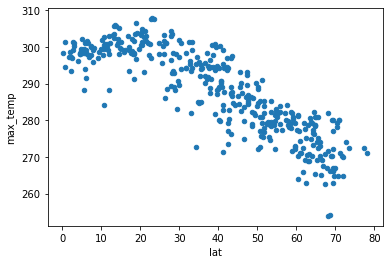

In [51]:
#create scatter plot
n_hem.plot(kind="scatter", x='lat', y='max_temp')

In [86]:
#find linear regression on temperature vs. latitude
#source: In class examples
from scipy import stats

    
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_hem['lat'], n_hem['max_temp'])

 #Get regression values
regress_values = n_hem['lat'] * slope + intercept
print(regress_values)

 

1      271.310160
2      272.821399
3      286.202255
5      294.787081
8      297.222102
          ...    
573    296.754573
574    287.136589
575    299.961066
578    275.232424
579    303.137733
Name: lat, Length: 387, dtype: float64


In [80]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.48x +306.73


The r-value is: 0.7303057999186328


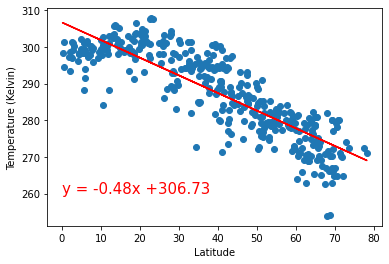

<Figure size 432x288 with 0 Axes>

In [88]:
# Create Plot
plt.scatter(n_hem['lat'],n_hem['max_temp'])
plt.plot(n_hem['lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (Kelvin)')
plt.annotate(line_eq,(0,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("NHLinReg.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
# Create dataFrame for Southern Hemisphere Data
s_hem = weather_df[weather_df['lat'] <= 0]
s_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Cape Town,-33.9258,18.4232,291.08,85,0,0.45,ZA,1633988204
4,Hobart,-42.8794,147.3294,282.66,81,40,0.45,AU,1633988456
6,Mataura,-46.1927,168.8643,279.16,87,99,3.93,NZ,1633988456
7,Hermanus,-34.4187,19.2345,289.21,80,100,0.93,ZA,1633988457
9,Rikitea,-23.1203,-134.9692,296.61,77,90,5.92,PF,1633988457
...,...,...,...,...,...,...,...,...,...
566,Canala,-21.5333,165.9500,298.42,62,45,3.00,NC,1633988641
569,Lábrea,-7.2586,-64.7981,303.71,55,92,0.93,BR,1633988643
571,Codrington,-38.2667,141.9667,280.96,76,20,5.23,AU,1633988643
576,Ambon City,-3.6954,128.1814,297.23,94,20,2.06,ID,1633988645


<AxesSubplot:xlabel='lat', ylabel='max_temp'>

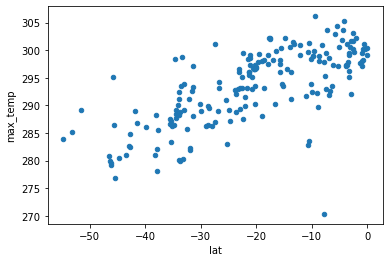

In [89]:
#create scatter plot
s_hem.plot(kind="scatter", x='lat', y='max_temp')

In [91]:
#find linear regression on temperature vs. latitude
#source: In class examples
from scipy import stats

    
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_hem['lat'], s_hem['max_temp'])

 #Get regression values
regress_values_s = s_hem['lat'] * slope + intercept
print(regress_values_s)


0      288.595646
4      285.378717
6      284.188286
7      288.418552
9      292.477941
          ...    
566    293.048132
569    298.176872
571    287.036009
576    299.457090
577    300.473411
Name: lat, Length: 193, dtype: float64


In [92]:
# Create line equation string
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_s)

y = 0.36x +300.78


The r-value is: 0.5028570108125375


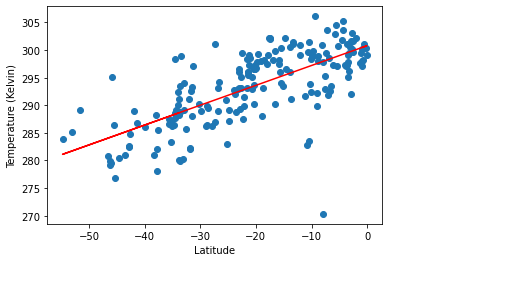

<Figure size 432x288 with 0 Axes>

In [94]:
# Create Plot
plt.scatter(s_hem['lat'], s_hem['max_temp'])
plt.plot(s_hem['lat'],regress_values_s,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (Kelvin)')
plt.annotate(line_eq_s,(0,260),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("SHLinReg.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<AxesSubplot:xlabel='lat', ylabel='humidity'>

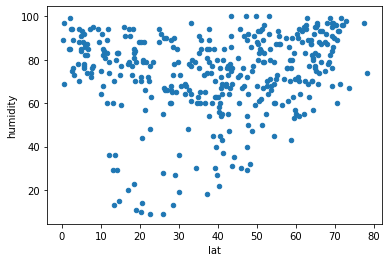

In [96]:
#create scatter plot
n_hem.plot(kind="scatter", x='lat', y='humidity')

In [104]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_hem['lat'], n_hem['humidity'])

 #Get regression values
regress_values_nh = n_hem['lat'] * slope + intercept
print(regress_values_nh)

1      77.603243
2      77.220998
3      73.836507
5      71.665102
8      71.049199
         ...    
573    71.167454
574    73.600181
575    70.356419
578    76.611164
579    69.552928
Name: lat, Length: 387, dtype: float64


In [105]:
# Create line equation string
line_eq_nh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_nh)

y = 0.12x +68.64


The r-value is: 0.017110366439191737


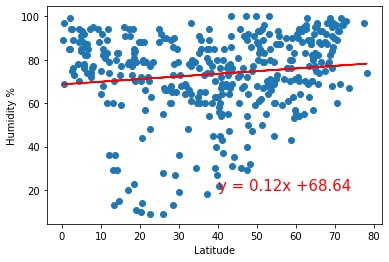

<Figure size 432x288 with 0 Axes>

In [109]:
# Create Plot
plt.scatter(n_hem['lat'], n_hem['humidity'])
plt.plot(n_hem['lat'],regress_values_nh,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq_nh,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("NHLinRegHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<AxesSubplot:xlabel='lat', ylabel='humidity'>

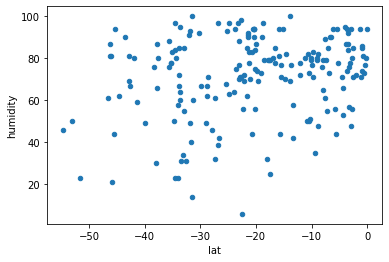

In [110]:
#create scatter plot
s_hem.plot(kind="scatter", x='lat', y='humidity')

In [112]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_hem['lat'], s_hem['humidity'])

 #Get regression values
regress_values_sh = s_hem['lat'] * slope + intercept
print(regress_values_sh)

0      67.009770
4      63.987636
6      62.869288
7      66.843400
9      70.656982
         ...    
566    71.192647
569    76.010827
571    65.544574
576    77.213524
577    78.168303
Name: lat, Length: 193, dtype: float64


In [113]:
# Create line equation string
line_eq_sh = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_sh)

y = 0.34x +78.46


The r-value is: 0.054083065208880295


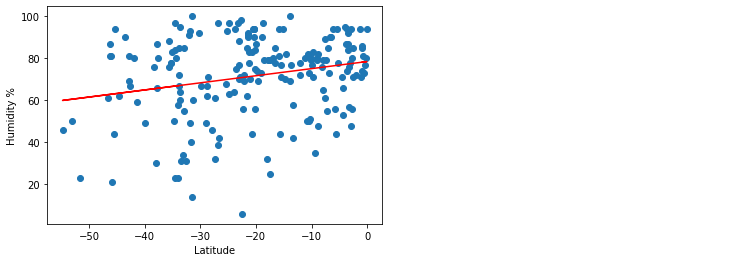

<Figure size 432x288 with 0 Axes>

In [114]:
# Create Plot
plt.scatter(s_hem['lat'], s_hem['humidity'])
plt.plot(s_hem['lat'],regress_values_sh,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq_sh,(40,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("SHLinRegHumidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<AxesSubplot:xlabel='lat', ylabel='cloudiness'>

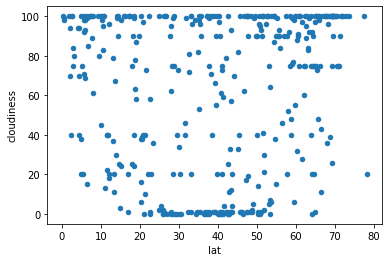

In [98]:
#create scatter plot
n_hem.plot(kind="scatter", x='lat', y='cloudiness')

In [115]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_hem['lat'], n_hem['cloudiness'])

 #Get regression values
regress_values_nc = n_hem['lat'] * slope + intercept
print(regress_values_nc)

1      67.007410
2      66.452618
3      61.540365
5      58.388786
8      57.494864
         ...    
573    57.666499
574    61.197362
575    56.489361
578    65.567506
579    55.323174
Name: lat, Length: 387, dtype: float64


In [116]:
# Create line equation string
line_eq_nc = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_nc)

y = 0.18x +54.0


The r-value is: 0.008627303062195573


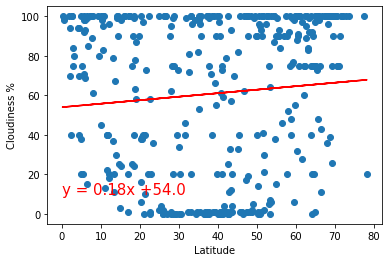

<Figure size 432x288 with 0 Axes>

In [118]:
# Create Plot
plt.scatter(n_hem['lat'], n_hem['cloudiness'])
plt.plot(n_hem['lat'],regress_values_nc,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq_nc,(0,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("NHLinRegCloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<AxesSubplot:xlabel='lat', ylabel='cloudiness'>

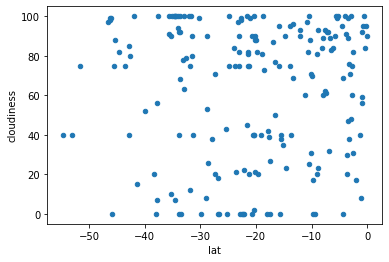

In [99]:
#create scatter plot
s_hem.plot(kind="scatter", x='lat', y='cloudiness')

In [119]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_hem['lat'], s_hem['cloudiness'])

 #Get regression values
regress_values_sc = s_hem['lat'] * slope + intercept
print(regress_values_sc)

0      61.229172
4      60.657729
6      60.446266
7      61.197714
9      61.918807
         ...    
566    62.020094
569    62.931143
571    60.952124
576    63.158556
577    63.339091
Name: lat, Length: 193, dtype: float64


In [120]:
# Create line equation string
line_eq_sc = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_sc)

y = 0.06x +63.39


The r-value is: 0.0006162485751002986


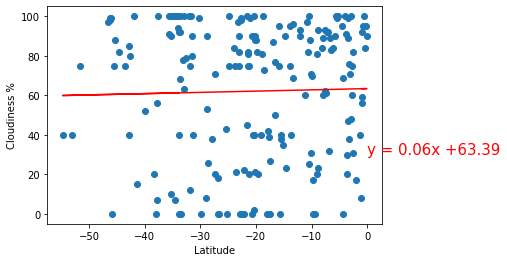

<Figure size 432x288 with 0 Axes>

In [127]:
# Create Plot
plt.scatter(s_hem['lat'], s_hem['cloudiness'])
plt.plot(s_hem['lat'],regress_values_sc,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq_sc,(0, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("SHLinRegCloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<AxesSubplot:xlabel='lat', ylabel='wind_speed'>

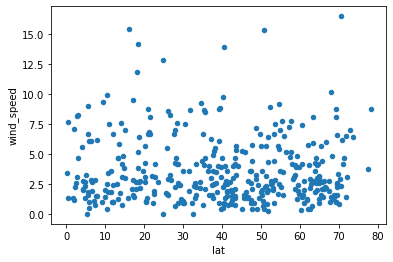

In [100]:
#create scatter plot
n_hem.plot(kind="scatter", x='lat', y='wind_speed')

In [128]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(n_hem['lat'], n_hem['wind_speed'])

 #Get regression values
regress_values_nw = n_hem['lat'] * slope + intercept
print(regress_values_nw)

1      3.422645
2      3.434550
3      3.539954
5      3.607579
8      3.626761
         ...   
573    3.623078
574    3.547314
575    3.648336
578    3.453542
579    3.673360
Name: lat, Length: 387, dtype: float64


In [129]:
# Create line equation string
line_eq_nw = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_nw)

y = -0.0x +3.7


The r-value is: 0.0008285047190879475


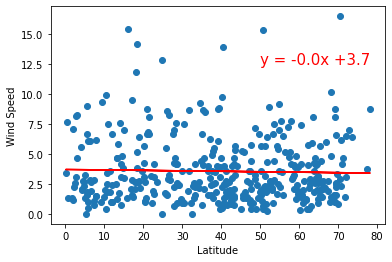

<Figure size 432x288 with 0 Axes>

In [134]:
# Create Plot
plt.scatter(n_hem['lat'], n_hem['wind_speed'])
plt.plot(n_hem['lat'],regress_values_nw,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_nw,(50, 12.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("NHLinRegWindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<AxesSubplot:xlabel='lat', ylabel='wind_speed'>

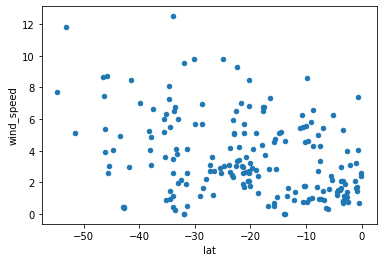

In [101]:
#create scatter plot
s_hem.plot(kind="scatter", x='lat', y='wind_speed')

In [135]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(s_hem['lat'], s_hem['wind_speed'])

 #Get regression values
regress_values_sw = s_hem['lat'] * slope + intercept
print(regress_values_sw)

0      4.391589
4      4.959427
6      5.169557
7      4.422849
9      3.706304
         ...   
566    3.605657
569    2.700354
571    4.666890
576    2.474376
577    2.294980
Name: lat, Length: 193, dtype: float64


In [136]:
# Create line equation string
line_eq_sw = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_sw)

y = -0.06x +2.24


The r-value is: 0.11461380864443395


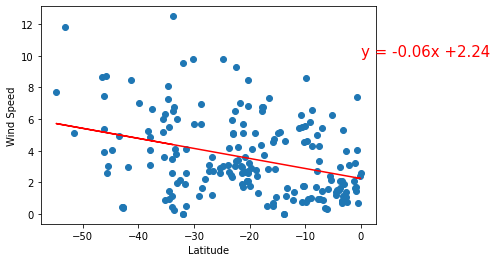

<Figure size 432x288 with 0 Axes>

In [139]:
# Create Plot
plt.scatter(s_hem['lat'], s_hem['wind_speed'])
plt.plot(s_hem['lat'],regress_values_sw,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_sw,(0, 10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("SHLinRegWindSpeed.png")